In [21]:
#importar librerias importantes

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_predict

In [2]:
#Lectura de Datos y presentación

datos=pd.read_excel('Base de datos 2.0.xlsx', header=0, error_bad_lines=False)
datos.head()

,Estraus,Comuna,Comercio,Educación,Habitación,Industria (1),Servicios (2),Otros (3),Sin Considerar (3),Total,...,min dist metro,Porcentaje proposito trabajo,porcentaje proposito estudio,porcentaje proposito volver a la casa,porcentaje ir de compras,porcentaje modo privado,porcentaje modo publico,porcentaje no motorizado,Área total (m2),sector
0,1,Independencia,12650,6333,78152,30140,8368,7563,40252,183458,...,3.041252,14.4932,8.9110,48.1465,8.4019,27.6373,23.7660,40.0923,4.678599e+05,norte
1,2,Independencia,39228,37662,321692,30722,19166,23144,33313,504927,...,1.609982,18.3619,8.5748,47.6031,13.9849,20.6951,30.0959,45.9323,1.134592e+06,norte
2,3,Independencia,46808,8041,213874,66033,12047,10053,35719,392575,...,2.549236,15.2141,5.9068,55.9761,8.4050,25.3639,11.8234,60.9220,9.133002e+05,norte
3,4,Independencia,32304,10895,247644,24324,14220,12453,47382,389222,...,1.620016,21.5194,8.7828,44.8588,16.4969,23.7714,23.5462,48.6555,7.513172e+05,norte
4,5,Independencia,11346,4685,59839,53861,6338,2742,30640,169451,...,3.120056,13.8301,0.0000,78.9652,4.8030,12.0075,21.1816,57.0884,4.106979e+05,norte


In [3]:
#Transformación Variables Categóricas
datoscat= datos[['sector']]
datoscat=pd.get_dummies(datoscat, columns = ['sector'], drop_first = True)
datoscat.head(10)

,sector_norte,sector_oriente,sector_poniente,sector_sur,sector_sur-oriente
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
5,1,0,0,0,0
6,1,0,0,0,0
7,1,0,0,0,0
8,1,0,0,0,0
9,1,0,0,0,0


In [4]:
#Estandarizacion Variables continuas
datoscont =datos[['Comercio','Educación','Habitación','Industria (1)','Servicios (2)','Otros (3)',
                  'Sin Considerar (3)','Min dist hosp (km)','Min dist esc',
                 'Min dist autopista','min dist cc','min dist metro','Porcentaje proposito trabajo',
                 'porcentaje proposito estudio','porcentaje ir de compras','porcentaje modo privado',
                  'porcentaje modo publico','porcentaje no motorizado','Área total (m2)']]
scaler=preprocessing.StandardScaler()
datos_est=scaler.fit_transform(datoscont)
datos_cont_est=pd.DataFrame({'Comercio':datos_est[:,0],'Educación':datos_est[:,1],'Habitación':datos_est[:,2],'Industria':datos_est[:,3],
                  'Servicios':datos_est[:,4],'Otros':datos_est[:,5],'Sin Considerar':datos_est[:,6],
                  'Dist_Hosp':datos_est[:,7],'Dist_Esc':datos_est[:,8],'Dist_Autopista':datos_est[:,9],
                  'Dist_CC':datos_est[:,10],'Dist_Metro':datos_est[:,11],'Prop_Trabajo':datos_est[:,12],
                  'Prop_Estudio':datos_est[:,13],'Prop_Compras':datos_est[:,14],'Modo_Privado':datos_est[:,15],
                  'Modo_Público':datos_est[:,16],'Modo_NoMotorizado':datos_est[:,17],'Area':datos_est[:,18]})
datos_cont_est.head()

,Comercio,Educación,Habitación,Industria,Servicios,Otros,Sin Considerar,Dist_Hosp,Dist_Esc,Dist_Autopista,Dist_CC,Dist_Metro,Prop_Trabajo,Prop_Estudio,Prop_Compras,Modo_Privado,Modo_Público,Modo_NoMotorizado,Area
0,-0.213384,-0.315154,-0.711652,0.238135,-0.186970,-0.148238,-0.083052,-0.346437,-0.332790,-0.770076,0.753861,0.120549,-0.120446,0.249972,-0.330194,-0.041228,-0.548257,0.108071,-0.174451
1,0.543424,1.721085,0.615364,0.250041,-0.024774,0.910651,-0.146974,-0.771294,-0.268814,-0.082552,0.292602,-0.393853,0.153017,0.199148,0.482824,-0.455163,0.015938,0.470327,-0.103766
2,0.759265,-0.204142,0.027878,0.972398,-0.131708,0.020983,-0.124810,-0.621059,0.067880,-0.587749,0.278715,-0.056283,-0.069488,-0.204173,-0.329742,-0.176781,-1.612720,1.400142,-0.127226
3,0.346264,-0.018646,0.211886,0.119158,-0.099067,0.184088,-0.017370,-1.000202,-0.616679,-0.330432,-0.279046,-0.390246,0.376208,0.230592,0.848631,-0.271736,-0.567848,0.639248,-0.144399
4,-0.250515,-0.422267,-0.811437,0.723395,-0.217462,-0.475875,-0.171598,-0.513320,-0.192178,-0.893480,0.437231,0.148872,-0.167318,-1.097102,-0.854279,-0.973169,-0.778608,1.162343,-0.180511


In [5]:
#Creación de Matriz de Caracteristicas y Variable Respuesta

X=pd.concat([datoscat,datos_cont_est],axis=1)
y =datos[['Comercio 2014']]

In [6]:
#Fijación de hiperparámetros

parametros= { 'max_depth': [None,3,5,10,15,18,20],'min_samples_leaf': [2,3,4,5,8,10,12,15],'max_features':['auto','sqrt','log2']}

In [7]:
#Busqueda Grid Search CV

RegressionTree_GridSearch= GridSearchCV(DecisionTreeRegressor(), parametros, cv=5, scoring='r2')
RegressionTree_GridSearch.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [None, 3, 5, 10, 15, 18, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                    

In [8]:
#Mejores hiperparametros
RegressionTree_GridSearch.best_params_

{'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 15}

In [9]:
#Resultados GridSearch
RegressionTree_GridSearch.cv_results_

{'mean_fit_time': array([0.08727565, 0.01279163, 0.01456037, 0.01723652, 0.01380515,
        0.01562099, 0.01250463, 0.01693254, 0.00937247, 0.00624976,
        0.0093791 , 0.0075542 , 0.        , 0.00937476, 0.00312123,
        0.00625362, 0.00755868, 0.00624652, 0.00938039, 0.00624943,
        0.00443497, 0.00624962, 0.00130181, 0.0062511 , 0.00755219,
        0.00937681, 0.00442681, 0.00624886, 0.00709062, 0.00312719,
        0.00625439, 0.00442929, 0.00937939, 0.00624943, 0.00936556,
        0.00312152, 0.        , 0.        , 0.00756321, 0.00624952,
        0.00130172, 0.00937619, 0.        , 0.00242367, 0.00564675,
        0.0060586 , 0.0056356 , 0.00444098, 0.01006837, 0.01051812,
        0.02378449, 0.01562886, 0.00937386, 0.00937529, 0.01250105,
        0.01694078, 0.00312419, 0.00479898, 0.00559869, 0.00480552,
        0.00239625, 0.00625582, 0.00312014, 0.00130572, 0.00937948,
        0.00722671, 0.00586257, 0.00404224, 0.00612578, 0.0060606 ,
        0.00444956, 0.00605698,

In [14]:
#Implementación Modelo

model= DecisionTreeRegressor(max_depth=10,min_samples_leaf=15 ,max_features='auto')

In [15]:
#Cross Validation

Scores = cross_val_score(model, X, y.values.ravel(), cv=5, scoring=('r2'))
Scores

array([0.51181659, 0.62778404, 0.63869048, 0.3479603 , 0.69711934])

In [16]:
#Train Test Split
model2= DecisionTreeRegressor(max_depth=10,min_samples_leaf=15 ,max_features='auto')
X_train0, X_test0, y_train0, y_test0 = train_test_split(X, y, test_size=0.3, random_state=42)

model2.fit(X_train0,y_train0)
Y_predicho=model2.predict(X_test0)

In [17]:
rendTest= model2.score(X_test0, y_test0)
rendTrain= model2.score(X_train0, y_train0)


In [18]:
rendTest

0.595273865770356

In [19]:
rendTrain

0.713120479331761

In [10]:
#Fijación de hiperparámetros Randomize

parametros2= {'max_depth': [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], 'min_samples_leaf':[2,3,4,5,6,7,8,9,10,11,12,13,14,15],'max_features':['auto','sqrt','log2']}

In [11]:
#Busqueda Randomize Search CV

RegressionTree_RS= RandomizedSearchCV(DecisionTreeRegressor(), parametros2, cv=10, scoring='r2',n_iter=60)
RegressionTree_RS.fit(X,y)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort='deprecated',
                                                   random_state=None,
                                                   splitter='best'),
                   iid='

In [12]:
RegressionTree_RS.best_params_

{'min_samples_leaf': 14, 'max_features': 'auto', 'max_depth': 17}

In [13]:
RegressionTree_RS.cv_results_

{'mean_fit_time': array([1.1001719 , 0.0382205 , 0.0230154 , 0.0192569 , 0.01715288,
        0.02472813, 0.01464446, 0.01202765, 0.01366484, 0.00226626,
        0.0072077 , 0.00901721, 0.01175208, 0.01974812, 0.00957398,
        0.01571028, 0.01663318, 0.01075013, 0.01651537, 0.00955915,
        0.01851335, 0.00838463, 0.01541104, 0.00849149, 0.01309526,
        0.01905661, 0.00902045, 0.0144124 , 0.00889027, 0.01241624,
        0.0105015 , 0.00769451, 0.00853481, 0.00821869, 0.0100296 ,
        0.00738187, 0.0171453 , 0.00675046, 0.00861824, 0.00618813,
        0.00896888, 0.01046846, 0.00946479, 0.01949105, 0.00796175,
        0.00657883, 0.01259341, 0.01110928, 0.01200743, 0.00896766,
        0.00790753, 0.00894346, 0.01615407, 0.01169024, 0.00635655,
        0.00468948, 0.00693173, 0.01617911, 0.01746118, 0.01457286]),
 'std_fit_time': array([3.23658642e+00, 3.63772396e-02, 1.50658181e-02, 1.43306845e-02,
        1.40436131e-02, 1.69065101e-02, 8.12805524e-03, 8.55823675e-03,
     

C:\Users\Cristobal\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


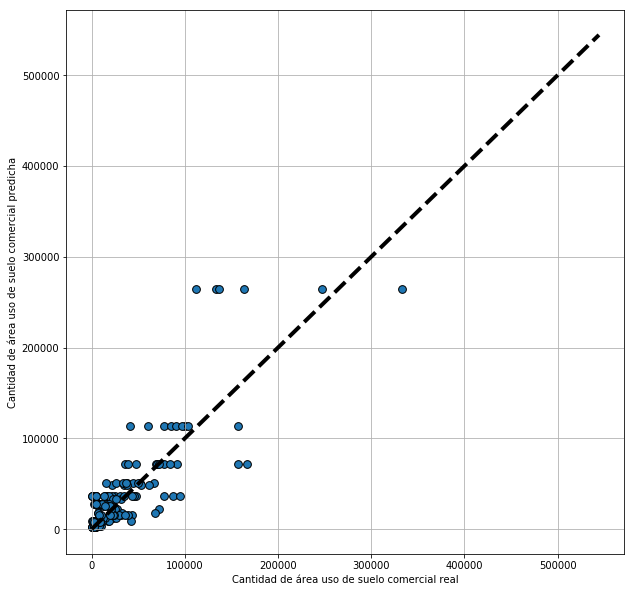

In [20]:
#Grafico Train Test Split
fig,ax = plt.subplots(1, figsize=(10,10))
plt.grid(True)
ax.scatter(y_test0, Y_predicho,s=60,edgecolors='black')
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Cantidad de área uso de suelo comercial real')
ax.set_ylabel('Cantidad de área uso de suelo comercial predicha')
fig.show()

In [23]:
model3= DecisionTreeRegressor(max_depth=10,min_samples_leaf=15 ,max_features='auto')
predicted = cross_val_predict(model3, X, y, cv=5)

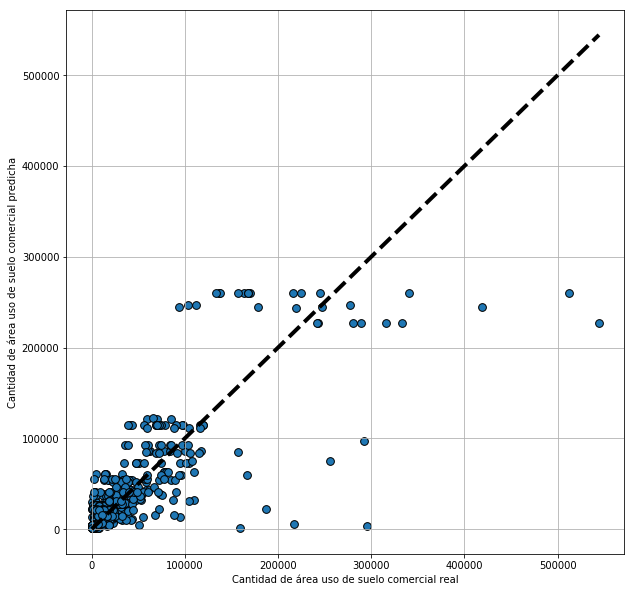

In [24]:
# Grafico CV
fig, ax = plt.subplots(1, figsize=(10,10))
plt.grid(True)
ax.scatter(y, predicted,s=60,edgecolors='black')
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Cantidad de área uso de suelo comercial real')
ax.set_ylabel('Cantidad de área uso de suelo comercial predicha')
plt.show()